In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class GradientDescentOptimizer:
    def __init__(self,numScale,learningRate,lossLimit):
        self.numScale=numScale
        self.learningRate=learningRate
        self.lossLimit=lossLimit

    def sigmoid(self,xMatrix,wVec):
        return 1 / (1 + np.exp(-np.dot(xMatrix, wVec)))
    
    def calcGradient(self,xMatrix,wVec,tVec,lambdaPenalty):
        return xMatrix.T.dot(tVec-self.sigmoid(xMatrix,wVec))+ lambdaPenalty * wVec
    
    def calcLoss(self,xMatrix,wVec,tVec,lambdaPenalty):
        return np.sum(-np.dot(tVec.T, np.log(self.sigmoid(xMatrix, wVec)))-np.dot((np.ones((len(tVec), 1)) - tVec).T,np.log(np.ones((len(tVec), 1)) - self.sigmoid(xMatrix, wVec)),))/len(xMatrix) + 0.5*lambdaPenalty*np.dot(wVec.T,wVec)
    
    def optimizeParam(self,xMatrix,wVec,tVec,lambdaPenalty):
        # 观测优化过程以及优化次数的限制
        ck=0
        # 记录Loss值
        lastLoss=self.calcLoss(xMatrix,wVec,tVec,lambdaPenalty)
        loss=lastLoss
        while True:
            wVecTmp=wVec+self.learningRate*self.calcGradient(xMatrix,wVec,tVec,lambdaPenalty)
            lossTmp=self.calcLoss(xMatrix,wVecTmp,tVec,lambdaPenalty)
            if lossTmp>lastLoss:
                self.learningRate*=0.5
            else:
                wVec=wVecTmp
                loss=lossTmp
                if(np.abs(loss-lastLoss)<self.lossLimit) and (loss<=1.3 or wVec.shape[0]<=3):
                    break
                lastLoss=loss
            ck+=1
        return wVec,ck

In [10]:
# class GradientDescentOptimizer:
#     def __init__(self,numScale,learningRate,lossLimit):
#         self.numScale=numScale
#         self.learningRate=learningRate
#         self.lossLimit=lossLimit

#     def sigmoid(self,xMatrix,wVec):
#         return 1 / (1 + np.exp(-np.dot(xMatrix, wVec)))
    
#     def calcGradient(self,xMatrix,wVec,tVec,lambdaPenalty):
#         return xMatrix.T.dot(tVec-self.sigmoid(xMatrix,wVec))+ lambdaPenalty * wVec
    
#     def calcLoss(self,xMatrix,wVec,tVec,lambdaPenalty):
#         return np.sum(tVec.T.dot(np.dot(xMatrix,wVec))+np.log(1+np.exp(xMatrix.dot(wVec))))/len(xMatrix) + 0.5*lambdaPenalty*np.dot(wVec.T,wVec)
    
#     def optimizeParam(self,xMatrix,wVec,tVec,lambdaPenalty):
#         # 观测优化过程以及优化次数的限制
#         ck=0
#         while True:
#             print(self.calcLoss(xMatrix,wVec,tVec,lambdaPenalty))
#             grad = self.learningRate*self.calcGradient(xMatrix,wVec,tVec,lambdaPenalty)
#             if np.linalg.norm(grad) < self.lossLimit or ck >=1000000:
#                 break
#             wVec += self.learningRate*grad
#             ck+=1
#         print(wVec,ck)
#         return wVec,ck

In [11]:
def makeData(numScale,mean,sigma):
    data = np.random.permutation(np.random.multivariate_normal(mean,sigma,numScale))
    data = np.hstack((np.array([1 for _ in range(0,len(data))]).reshape(len(data),1),data))
    # Shuffle数据，并划分数据集和测试集
    train= data[0:int(0.85*numScale),]
    test= data[len(train):len(data),]
    return train,test
    
def drawLine(wVec):
    x = np.linspace(-2, 8, 100)
    print(x)
    y = (-wVec[0][0] - wVec[1][0] * x) / wVec[2][0]
    plt.plot(x,y,label="划分线")

In [12]:
# 计算正确率
def judge(wVec,test1,test2):
    result1 = test1.dot(wVec)
    result2 = test2.dot(wVec)
    errCnt = 0
    for i in result1:
        if i > 0:
            errCnt += 1
    for i in result2:
        if i < 0:
            errCnt += 1
    return (len(test1)+len(test2)-errCnt)/(len(test1)+len(test2))

In [13]:
NUM_SCALE = 1000
LEARNING_RATE = 0.01
LOSS_LIMIT = 1e-8

# 生成数据
train1,test1 = makeData(NUM_SCALE,np.array([1,4]),np.array([[1, 0], [0, 1]]))
train2,test2 = makeData(NUM_SCALE,np.array([4,7]),np.array([[1, 0], [0, 1]]))

In [14]:
# 生成训练数据并无正则项的梯度下降
data = np.vstack((train1,train2))
label = np.vstack((np.zeros((len(train1),1)),np.ones((len(train2),1))))
optimizer=GradientDescentOptimizer(NUM_SCALE,LEARNING_RATE,LOSS_LIMIT)
wVec,cnt = optimizer.optimizeParam(data,np.ones((3,1)),label,0)

/tmp/ipykernel_11521/1191429159.py:14: RuntimeWarning: divide by zero encountered in log
  return np.sum(-np.dot(tVec.T, np.log(self.sigmoid(xMatrix, wVec)))-np.dot((np.ones((len(tVec), 1)) - tVec).T,np.log(np.ones((len(tVec), 1)) - self.sigmoid(xMatrix, wVec)),))/len(xMatrix) + 0.5*lambdaPenalty*np.dot(wVec.T,wVec)


正确率：0.9766666666666667
[-2.         -1.8989899  -1.7979798  -1.6969697  -1.5959596  -1.49494949
 -1.39393939 -1.29292929 -1.19191919 -1.09090909 -0.98989899 -0.88888889
 -0.78787879 -0.68686869 -0.58585859 -0.48484848 -0.38383838 -0.28282828
 -0.18181818 -0.08080808  0.02020202  0.12121212  0.22222222  0.32323232
  0.42424242  0.52525253  0.62626263  0.72727273  0.82828283  0.92929293
  1.03030303  1.13131313  1.23232323  1.33333333  1.43434343  1.53535354
  1.63636364  1.73737374  1.83838384  1.93939394  2.04040404  2.14141414
  2.24242424  2.34343434  2.44444444  2.54545455  2.64646465  2.74747475
  2.84848485  2.94949495  3.05050505  3.15151515  3.25252525  3.35353535
  3.45454545  3.55555556  3.65656566  3.75757576  3.85858586  3.95959596
  4.06060606  4.16161616  4.26262626  4.36363636  4.46464646  4.56565657
  4.66666667  4.76767677  4.86868687  4.96969697  5.07070707  5.17171717
  5.27272727  5.37373737  5.47474747  5.57575758  5.67676768  5.77777778
  5.87878788  5.97979798  6.

/home/xingqwq/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


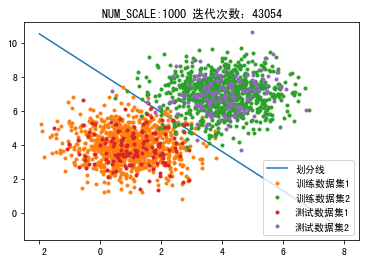

In [15]:
# 显示结果
print("正确率："+str(judge(wVec,test1,test2)))
drawLine(wVec)
plt.title("NUM_SCALE:"+str(NUM_SCALE)+" 迭代次数："+str(cnt))
plt.plot(train1[0:,1],train1[0:,2],".",label="训练数据集1")
plt.plot(train2[0:,1],train2[0:,2],".",label="训练数据集2")
plt.plot(test1[0:,1],test1[0:,2],".",label="测试数据集1")
plt.plot(test2[0:,1],test2[0:,2],".",label="测试数据集2")
plt.legend()
plt.show()